# Flight Delay Prediction
## Merging Flight and Weather Data

- Loading the aggregated flight and weather dataset csv files into Data Frames
- Column <strong>time</strong> in the weather dataset has been rounded to the nearest hour
- Processing the <strong>CRSDepTime</strong> column in the <strong>flight dataset</strong> to set up a <strong>Time_new</strong> column for merging by rounding to the nearest hour to match with the <strong>weather dataset</strong>
- Merging both the datasets into a df
- Ensuring by visualizing that the data has no missing values
- Storing df as <strong>flight_and_weather.csv</strong> in the <strong>Data</strong> directory

## Prerequisites

In [1]:
# Loading the required modules
import pandas as pd
import missingno as msno

# Loading the aggregated flight dataset and weather dataset
fd_df = pd.read_csv("Data/flight_data.csv", index_col=0)
wd_df = pd.read_csv("Data/weather_data.csv", index_col=0)

/home/admin/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Merge Criteria Analysis
The time column observations are rounded up to the nearest full hour in the weather dataset. Therefore, the CRSDepTime (scheduled flight departure time) of the flight dataset is also rounded up to the nearest full hour, so that the column can be equi-joined with the weather dataset.

In [2]:
wd_df["time"]

0            0
1          100
2          200
3          300
4          400
          ... 
263155    1900
263156    2000
263157    2100
263158    2200
263159    2300
Name: time, Length: 263160, dtype: int64

In [3]:
fd_df["CRSDepTime"]

0          2010
1          1450
2          2025
3            52
4          1445
           ... 
1851431    1500
1851432    1820
1851433     955
1851434     630
1851435    1235
Name: CRSDepTime, Length: 1851436, dtype: int64

In [4]:
# Creating a list to store the rounded CRSDepTime of flight data 
new_time = []
# Iterating through CRSDepTime
for time in fd_df["CRSDepTime"]:
    time = int(time)
    # Obtaining the minutes
    m = time % 100
    # If it is less than 30 mins, just subtract to round down
    if m < 30:
        time = time - m
    # If it is greater than or equal to 30 mins, round up
    elif(m >= 30) :
        time = time + (100 - m)
    # If it is 2400, make it 0
    if(time == 2400):
        time = 0
    new_time.append(time)
fd_df["Time_new"] = new_time
fd_df[["Time_new", "CRSDepTime"]]

,Time_new,CRSDepTime
0,2000,2010
1,1500,1450
2,2000,2025
3,100,52
4,1500,1445
...,...,...
1851431,1500,1500
1851432,1800,1820
1851433,1000,955
1851434,700,630


## Merging the Flight and Weather Data
Merging the data based on the departure airport, scheduled departure time (CRSDepTime) and date.

In [5]:
# Merging the data based on the departure airport, scheduled departure time and date
merged_df = pd.merge(fd_df, wd_df,
              how = "inner",
              left_on = ["Origin","Time_new", "FlightDate"],
              right_on = ["airport","time", "date"])
# Storing the merged dataset as a csv file
merged_df.to_csv("Data/flight_and_weather.csv")

## Checking for Missing Data

AxesSubplot(0.125,0.125;0.698618x0.755)
Year               0
Quarter            0
Month              0
DayofMonth         0
FlightDate         0
OriginAirportID    0
Origin             0
DestAirportID      0
Dest               0
CRSDepTime         0
DepTime            0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
Time_new           0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
date               0
time               0
airport            0
dtype: int64


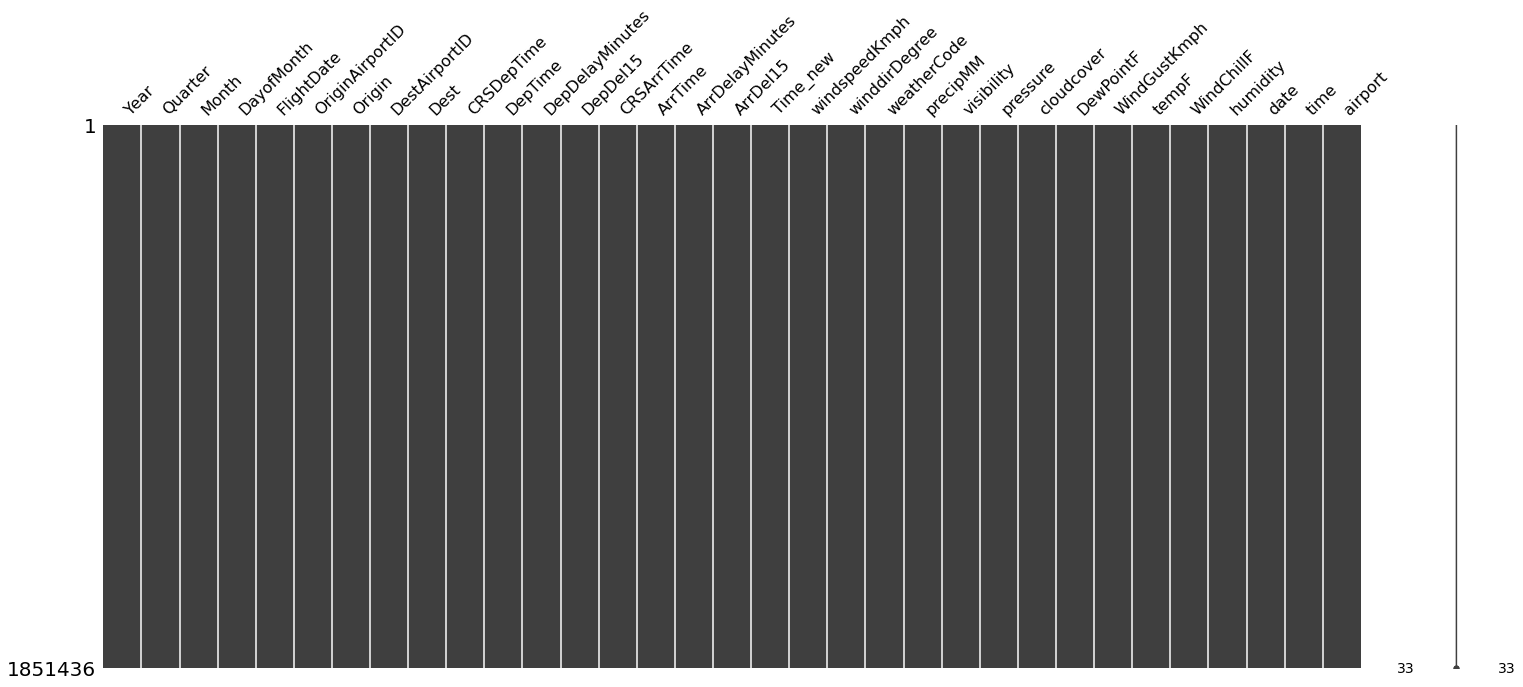

In [6]:
print(msno.matrix(merged_df))
print(merged_df.isnull().sum())

In [7]:
print(f"Shape: {merged_df.shape}\n\n")
print(merged_df.info())

Shape: (1851436, 33)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851436 entries, 0 to 1851435
Data columns (total 33 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Quarter          int64  
 2   Month            int64  
 3   DayofMonth       int64  
 4   FlightDate       object 
 5   OriginAirportID  int64  
 6   Origin           object 
 7   DestAirportID    int64  
 8   Dest             object 
 9   CRSDepTime       int64  
 10  DepTime          float64
 11  DepDelayMinutes  float64
 12  DepDel15         float64
 13  CRSArrTime       int64  
 14  ArrTime          float64
 15  ArrDelayMinutes  float64
 16  ArrDel15         float64
 17  Time_new         int64  
 18  windspeedKmph    int64  
 19  winddirDegree    int64  
 20  weatherCode      int64  
 21  precipMM         float64
 22  visibility       int64  
 23  pressure         int64  
 24  cloudcover       int64  
 25  DewPointF        int64  
 26  WindGustKmph     in

In [8]:
merged_df.head()

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport
0,2017,4,10,6,2017-10-06,11618,EWR,13930,ORD,2010,...,1018,13,68,8,78,78,73,2017-10-06,2000,EWR
1,2017,4,10,6,2017-10-06,11618,EWR,12266,IAH,2025,...,1018,13,68,8,78,78,73,2017-10-06,2000,EWR
2,2017,4,10,6,2017-10-06,11618,EWR,13204,MCO,1935,...,1018,13,68,8,78,78,73,2017-10-06,2000,EWR
3,2017,4,10,6,2017-10-06,11618,EWR,14107,PHX,1930,...,1018,13,68,8,78,78,73,2017-10-06,2000,EWR
4,2017,4,10,6,2017-10-06,11618,EWR,14747,SEA,1940,...,1018,13,68,8,78,78,73,2017-10-06,2000,EWR


In [9]:
merged_df.drop_duplicates()
print(merged_df.shape, end="\n\n")

(1851436, 33)

